# **Facial Emotion Detection**

## **Problem Definition**

**The context:** Why is this problem important to solve?<br>
> 
>Facial emotions make up as much as 55% of human communication. Understanding the relationships between facial expression and emotion can improve our understanding of human behavior. This can be used in fields such as psychology, robotics, and sociality. This could lead to better communication, improved health diagnostics, and intuitive AI.  
>
> 
**The objectives:** What is the intended goal?<br>
>
>The objective is to train a model that can accurately categorize human emotions based on facial expressions. 
>
**The key questions:** What are the key questions that need to be answered?<br>
>
>1. What does the data look like that will be feed to our models?
>2. Which model is best for identifying human emotion based on human facial expressions?
>   * Does a custom model perform better?
>   * Does a transfer learning model perform better?

**The problem formulation:** What are we trying to solve using data science?
> The scope of the problem is to accurately identify and categorize human emotions based on facial expressions using data science approaches such as preprocessing of image data and CNN modeling.  


## **About the dataset**

The data set consists of 3 folders, i.e., 'test', 'train', and 'validation'. 
Each of these folders has four subfolders:

**‘happy’**: Images of people who have happy facial expressions.<br>
**‘sad’**: Images of people with sad or upset facial expressions.<br>
**‘surprise’**: Images of people who have shocked or surprised facial expressions.<br>
**‘neutral’**: Images of people showing no prominent emotion in their facial expression at all.<br>


## **Mounting the Drive**

**NOTE:**  Please use Google Colab from your browser for this notebook. **Google.colab is NOT a library that can be downloaded locally on your device.**

In [1]:
#Using personal GPU for training the model
# Mounting the drive
# from google.colab import drive
# drive.mount('/content/drive')

## **Importing the Libraries**

In [2]:
import tensorflow as tf

from keras.models import Sequential
from keras.utils import load_img, img_to_array
# Importing all the different layers and optimizers
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation, LeakyReLU, Input,GlobalAveragePooling2D, Resizing
from keras.optimizers import Adam,SGD
from keras.preprocessing import image_dataset_from_directory
from keras.layers import Rescaling, RandomFlip, RandomRotation
from keras.callbacks import  EarlyStopping, ReduceLROnPlateau

import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image
import numpy as np

tf.config.experimental.set_memory_growth(tf.config.list_physical_devices('GPU')[0], True)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
import random
import shutil

random_seed = 42
# Set the random seed for TensorFlow
tf.random.set_seed(random_seed)

# Set the random seed for NumPy
np.random.seed(random_seed)

# Set the random seed for Python's built-in random module
random.seed(random_seed)

# Suppress TensorFlow warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # 0 = all messages are logged (default behavior), 1 = INFO messages are not printed, 2 = INFO and WARNING messages are not printed, 3 = INFO, WARNING, and ERROR messages are not printed

# Optionally, suppress other warnings
import warnings
warnings.filterwarnings('ignore')
os.environ['TF_GPU_TIMER_WARNING'] = '0'  # Suppress GPU timer warning

from keras.mixed_precision import set_global_policy

set_global_policy('float32')  # Default precision


2024-12-16 16:22:43.658457: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734384163.794689   12988 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734384163.861282   12988 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-16 16:22:44.170267: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Num GPUs Available:  1


### **Let us load and unzip the data**

**Note:** 
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [3]:
# Storing the path of the data file from the Google drive
path = 'Facial_emotion_images.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

## **Visualizing our Classes**

Let's look at our classes. 

**Write down your observation for each class. What do you think can be a unique feature of each emotion, that separates it from the remaining classes?**

In [4]:
picture_size = 48
folder_path = "Facial_emotion_images/"
emotions = ['happy', 'sad', 'neutral', 'surprise']


### **Happy**

**Observations and Insights: The cheek bones are raised while smiling. The teeth are shown when someone smiles. Eyes seem to squint while smiling. Mouth line make a upper right U shape**

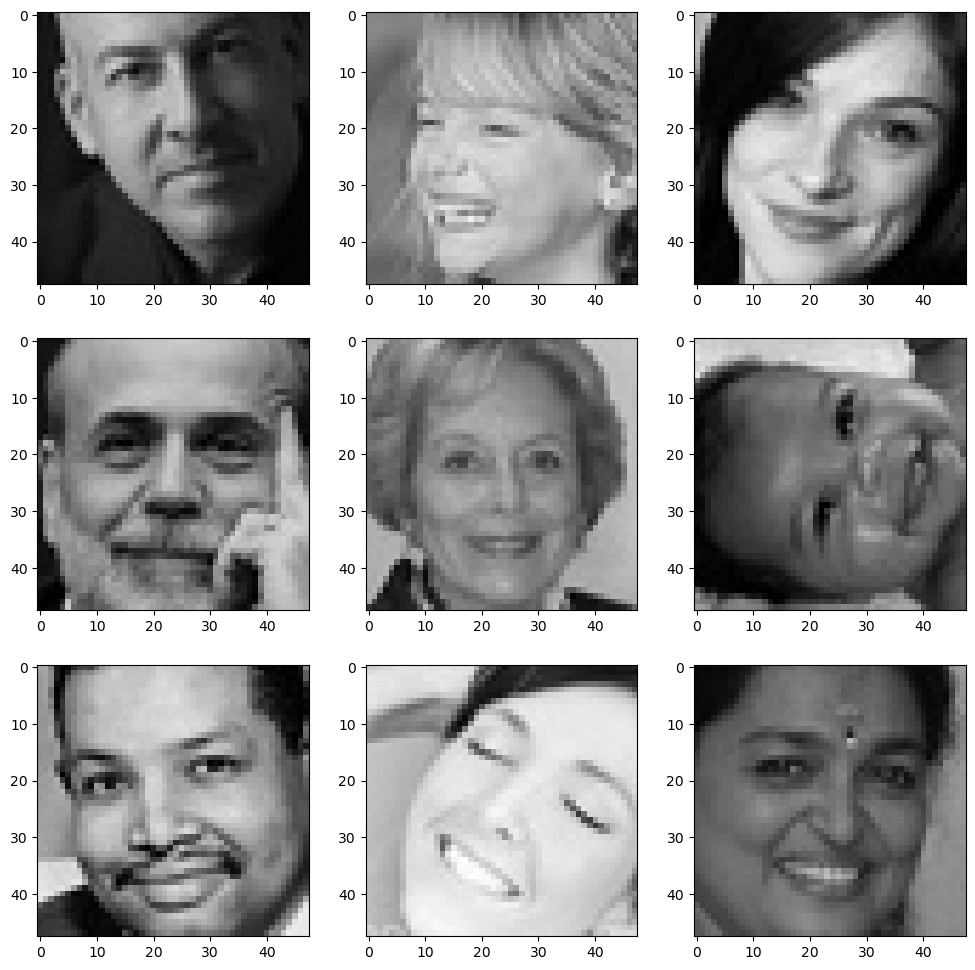

In [5]:
# Visualizing Happy emotion
emotion_type = 'happy'

# Create a figure and a grid of sub-plots
plt.figure(figsize = (12, 12))

#list all files in the folder
all_files = os.listdir(os.path.join(folder_path, "train", emotion_type))

# Filter out non-image files
image_files = [f for f in all_files if f.lower().endswith(('.jpg'))]

# Display the first 9 images
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)
    image_path = folder_path + "train/" + emotion_type + "/" + image_files[i]
    img = load_img(image_path, target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

### **Sad**

**Observations and Insights:The brow is creased. Mouth shape is shape like an upside down U. eyebrows point down**

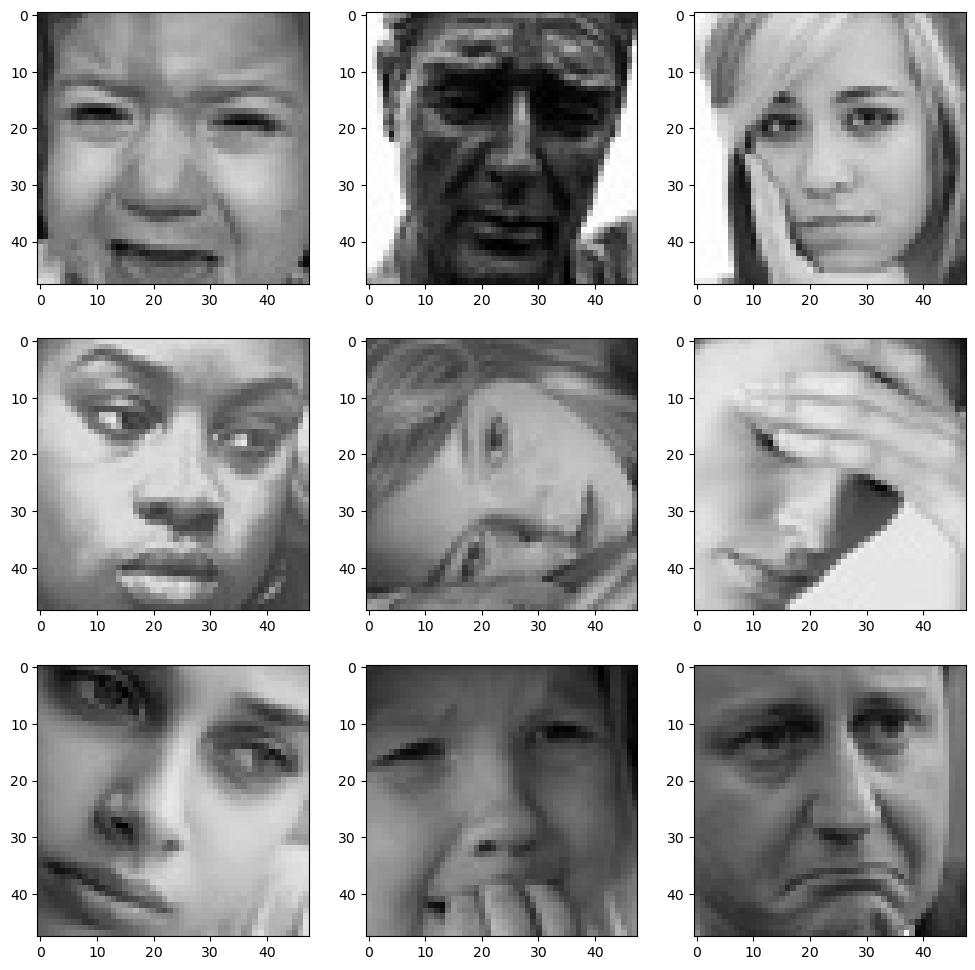

In [6]:
# Visualizing sad emotion
emotion_type = 'sad'

# Create a figure and a grid of sub-plots
plt.figure(figsize = (12, 12))

#list all files in the folder
all_files = os.listdir(os.path.join(folder_path, "train", emotion_type))

# Filter out non-image files
image_files = [f for f in all_files if f.lower().endswith(('.jpg'))]

# Display the first 9 images
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)
    image_path = folder_path + "train/" + emotion_type + "/" + image_files[i]
    img = load_img(image_path, target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

### **Neutral**

**Observations and Insights:Mouth line is stright. Less expressive faces**

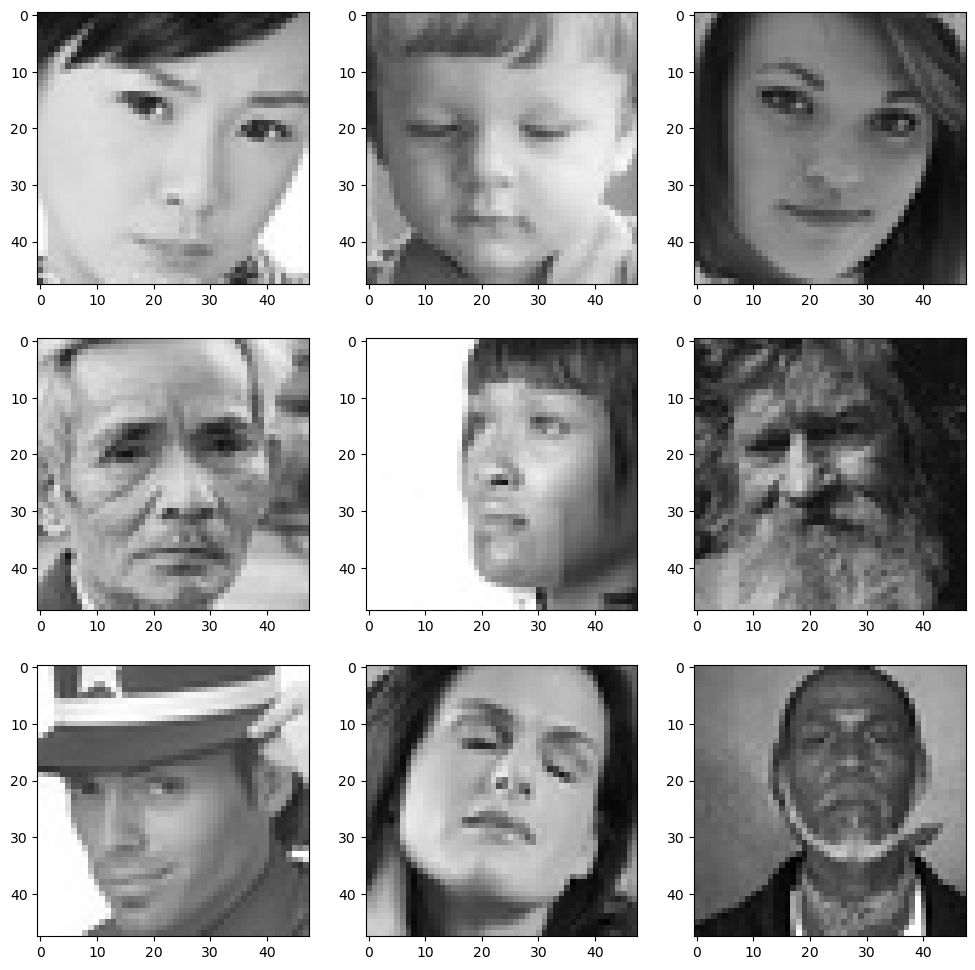

In [7]:
# Visualizing neutral emotion
emotion_type = 'neutral'


# Create a figure and a grid of sub-plots
plt.figure(figsize = (12, 12))

#list all files in the folder
all_files = os.listdir(os.path.join(folder_path, "train", emotion_type))

# Filter out non-image files
image_files = [f for f in all_files if f.lower().endswith(('.jpg'))]

# Display the first 9 images
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)
    image_path = folder_path + "train/" + emotion_type + "/" + image_files[i]
    img = load_img(image_path, target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

### **Surprised**

**Observations and Insights:Mouth can be open. Eyebrows raised**

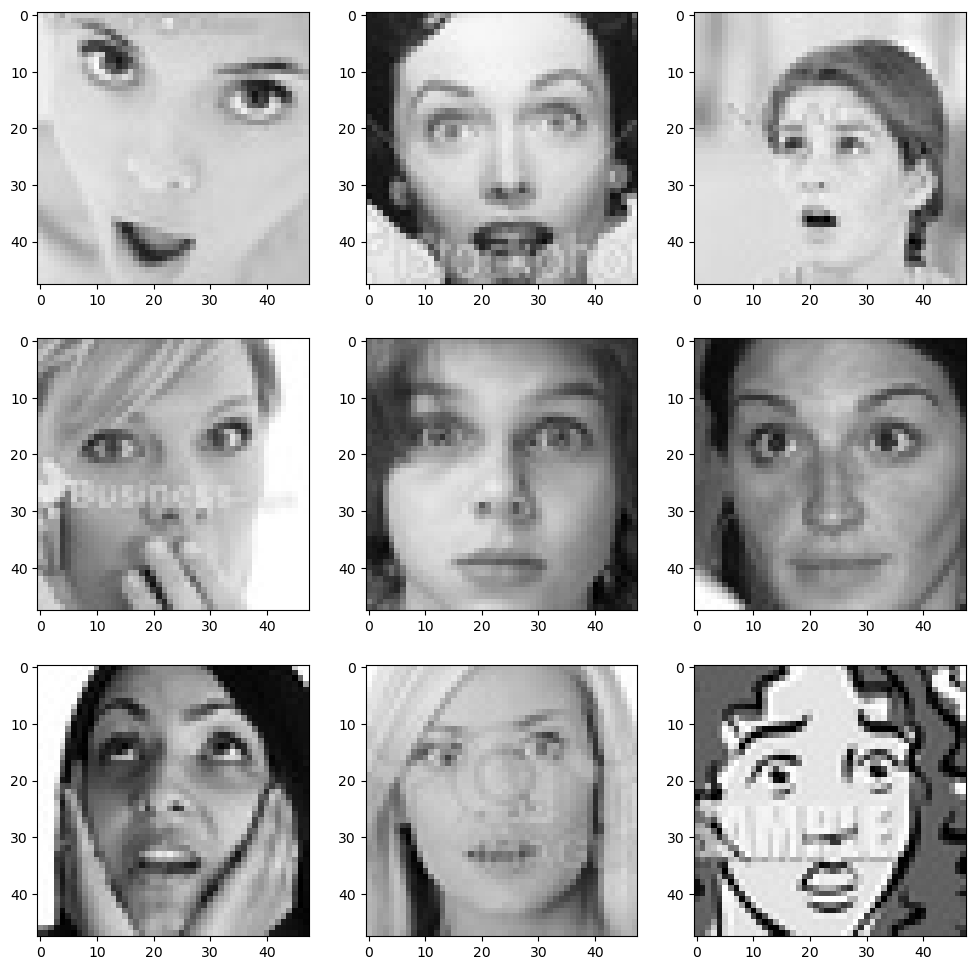

In [8]:
# Visualizing neutral emotion
emotion_type = 'surprise'

# Create a figure and a grid of sub-plots
plt.figure(figsize = (12, 12))

#list all files in the folder
all_files = os.listdir(os.path.join(folder_path, "train", emotion_type))

# Filter out non-image files
image_files = [f for f in all_files if f.lower().endswith(('.jpg'))]

# Display the first 9 images
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)
    image_path = folder_path + "train/" + emotion_type + "/" + image_files[i]
    img = load_img(image_path, target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

## **Checking Distribution of Classes**

Number of image files in 'Facial_emotion_images/train/happy': 3976
Number of image files in 'Facial_emotion_images/train/sad': 3982
Number of image files in 'Facial_emotion_images/train/neutral': 3978
Number of image files in 'Facial_emotion_images/train/surprise': 3173


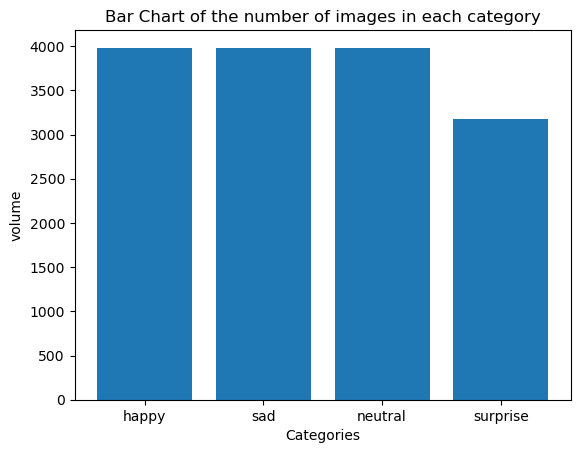

In [9]:
#TODO add histogram of the data
all_items = os.listdir(folder_path)
# Filter out the items that are files

num_array = []

for emotion in emotions:
    
    path = folder_path + "train/" + emotion
    
    # List all items in the emotion subfolder
    all_items = os.listdir(path)
    
    # Filter out the items that are files and check for common image file extensions
    image_files = [item for item in all_items if os.path.isfile(os.path.join(path, item)) and item.lower().endswith(('.jpg'))]

    # Count the number of image files
    num_files = len(image_files)

    print(f"Number of image files in '{path}': {num_files}")
    
    num_array.append(num_files)
    
plt.bar(emotions, num_array)    
# Add labels and title
plt.xlabel('Categories')
plt.ylabel('volume')
plt.title('Bar Chart of the number of images in each category')
plt.show()


**Observations and Insights:Sad has the most images where suprised has the least. Suprise is 800 images less than the other images**

**Think About It:** 
* Are the classes equally distributed? If not, do you think the imbalance is too high? Will it be a problem as we progress?
>
>The classes are almost equally distrusted except for surprise which is 800 less than the others. This could cause the model to have poor generalization of the class and overfitting on the other classes since they are seen more in training.
>
* Are there any Exploratory Data Analysis tasks that we can do here? Would they provide any meaningful insights?
>
>1. We could look at the distribution of woman vs men, children vs adults, age. It could help to see how the model is generalizing over the population.
>2. We can identify if any images are not useable such as is it a corrupted image or if there is a human face in the image
>

## **Data Preprocessing**

Use MTCNN model to identify pictures that dont look like faces to find bad data 

In [10]:
# from mtcnn import MTCNN
# import cv2
# import os
# import shutil
# from IPython.display import clear_output


# detector = MTCNN()
    
# confidence_threshold = 0.75
# def copy_images_with_faces(input_directory, output_directory):
#     # Create the output directory if it doesn't exist
#     os.makedirs(output_directory, exist_ok=True)
    
#     for filename in os.listdir(input_directory):
#         file_path = os.path.join(input_directory, filename)
#         img = cv2.imread(file_path)
        
#         if img is None:
#             print(f"Skipping unusable image: {file_path}")
#             continue
        
#         # Convert the image to RGB as MTCNN expects RGB images
#         rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#         faces = detector.detect_faces(rgb_img)
        
#         # Filter faces based on confidence threshold
#         faces = [face for face in faces if face['confidence'] >= confidence_threshold]
   
#         if len(faces) > 0:
#             # Save the image with faces to the output directory
#             output_path = os.path.join(output_directory, filename)
#             shutil.copy(file_path, output_path)
#             #print(f"Copied image with faces: {output_path}")
#         else:
#                         # Print the path of the image without faces and ask for input
#             print(f"Image without faces detected: {file_path}")
#             plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#             plt.axis('off')
#             plt.show()
#             user_input = input("Do you want to copy this image to the output directory? (y/n): ").strip().lower()
#             if user_input == 'y':
#                 output_path = os.path.join(output_directory, filename)
#                 shutil.copy(file_path, output_path)
#                 print(f"Copied image without faces: {output_path}")
#             else:
#                 print(f"Skipped image without faces: {file_path}")

#         clear_output(wait=True)

# directory = {
#     "train": folder_path + "train",
#     "test": folder_path + "test",
#     "validation": folder_path + "validation"
# }

# folder_path_processed = "Facial_emotions_images_processed/"

# directory_processed = {
#     "train": folder_path_processed + "train",
#     "test": folder_path_processed + "test",
#     "validation": folder_path_processed + "validation"
# }

# emotions = ["happy", "sad", "surprise", "neutral"]

# # Process each directory and emotion
# for key in directory:
#     for emotion in emotions:
#         input_dir = os.path.join(directory[key], emotion)
#         output_dir = os.path.join(directory_processed[key], emotion)
#         copy_images_with_faces(input_dir, output_dir)
# #train/happy/24891.jpg
# #train/happy/34681.jpg to dark
# #train/happy/25603.jpg
# #train/happy/20654.jpg check
# #train/happy/16540.jpg 
# #train/happy/26383.jpg
# #train/happy/31889.jpg too dark
# #train/happy/26766.jpg too darky
# #train/happy/29447.jpg too dark
# #train/happy/23429 high contrast
# #train.happy/23670 high contrast
# #train/sad/ 21926 werid image
# #train sad 10657 just a suit
# #train/sad/35632.jpg not an imagey
# #train/sad/23894 not image
# #train/sad/15655
# #13839
# #23596 not an image
# #30705 not image
# #training/suprised/13959 weird
# #training/suprised/20712 not image
# #training/suprised/5881 not image
# #2059
# #missed one in suprise
# #13988 not image
# #19000 something
# #2809
# #3262
# #32299 bad image
# #some baby shows up a bunch in suprise set
# #training/neutral/25909 not image
# #26897 not image
# #not image 22927
# #11846
# #19632
# #15553 bad image
# #35469 bad image
# #17081 not image
# #25219
# #31825
# #10219
# #34334
# #15144
# #24053
# #test/happy/15038
# #validation/happy/10023
# #30981
# #validation/suprise/35121
# #29557
# #validation/neutral/12289
# #21817
# #32683



Remove bad images from folder

In [11]:
training_happy = ['train/happy/24891.jpg',
'train/happy/34681.jpg',
'train/happy/25603.jpg',
'train/happy/20654.jpg',
'train/happy/16540.jpg',
'train/happy/26383.jpg',
'train/happy/31889.jpg',
'train/happy/26766.jpg',
'train/happy/29447.jpg',
'train/happy/23429.jpg',
'train.happy/23670.jpg',
'train/happy/20417.jpg',]

training_sad = ['train/sad/21926.jpg',
'train/sad/10657.jpg',
'train/sad/35632.jpg',
'train/sad/23894.jpg',
'train/sad/15655.jpg',
'train/sad/13839.jpg',
'train/sad/23596.jpg',
'train/sad/30705.jpg']

training_surprise = ['train/surprise/13959.jpg',
'train/surprise/20712.jpg',
'train/surprise/5881.jpg',
'train/surprise/2059.jpg',
'train/surprise/5722.jpg',

'train/surprise/13988.jpg',
'train/surprise/19238.jpg',
'train/surprise/2809.jpg',
'train/surprise/3262.jpg',
'train/surprise/32299.jpg']

training_neutral = ['train/neutral/25909.jpg',
'train/neutral/25909.jpg',
'train/neutral/26897.jpg',
'train/neutral/22927.jpg',
'train/neutral/11846.jpg',
'train/neutral/19632.jpg',
'train/neutral/15553.jpg',
'train/neutral/35469.jpg',
'train/neutral/17081.jpg',
'train/neutral/25219.jpg',
'train/neutral/31825.jpg',
'train/neutral/10219.jpg',
'train/neutral/34334.jpg',
'train/neutral/15144.jpg',
'train/neutral/24053.jpg',
'train/neutral/31127.jpg']

test_happy = ['test/happy/15038.jpg']

validation_happy = ['validation/happy/10023.jpg',
'validation/happy/30981.jpg']

validation_surprise = ['validation/surprise/35121.jpg',
                       'validation/surprise/29557.jpg']

validation_neutral = ['validation/neutral/12289.jpg',
'validation/neutral/21817.jpg',
'validation/neutral/32683.jpg']

# Combine all lists into one
files_to_remove = training_happy + training_sad + training_surprise + training_neutral + test_happy + validation_happy + validation_surprise + validation_neutral

# Base directory
base_dir = 'Facial_emotion_images'

# Remove files
for file_path in files_to_remove:
    full_path = os.path.join(base_dir, file_path)
    try:
        os.remove(full_path)
        print(f"Removed: {full_path}")
    except FileNotFoundError:
        print(f"File not found: {full_path}")
    except Exception as e:
        print(f"Error removing {full_path}: {e}")

Removed: Facial_emotion_images/train/happy/24891.jpg
Removed: Facial_emotion_images/train/happy/34681.jpg
Removed: Facial_emotion_images/train/happy/25603.jpg
Removed: Facial_emotion_images/train/happy/20654.jpg
Removed: Facial_emotion_images/train/happy/16540.jpg
Removed: Facial_emotion_images/train/happy/26383.jpg
Removed: Facial_emotion_images/train/happy/31889.jpg
Removed: Facial_emotion_images/train/happy/26766.jpg
Removed: Facial_emotion_images/train/happy/29447.jpg
Removed: Facial_emotion_images/train/happy/23429.jpg
File not found: Facial_emotion_images/train.happy/23670.jpg
Removed: Facial_emotion_images/train/happy/20417.jpg
Removed: Facial_emotion_images/train/sad/21926.jpg
Removed: Facial_emotion_images/train/sad/10657.jpg
Removed: Facial_emotion_images/train/sad/35632.jpg
Removed: Facial_emotion_images/train/sad/23894.jpg
Removed: Facial_emotion_images/train/sad/15655.jpg
Removed: Facial_emotion_images/train/sad/13839.jpg
Removed: Facial_emotion_images/train/sad/23596.jpg


Number of image files in 'Facial_emotion_images/train/happy': 3965
Number of image files in 'Facial_emotion_images/train/sad': 3974
Number of image files in 'Facial_emotion_images/train/neutral': 3963
Number of image files in 'Facial_emotion_images/train/surprise': 3163


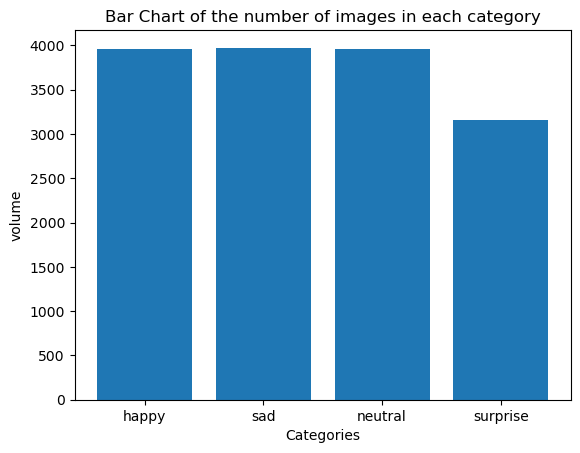

In [12]:
#TODO add histogram of the data
all_items = os.listdir(folder_path)

emotions = ['happy', 'sad', 'neutral', 'surprise']
# Filter out the items that are files

num_array = []

for emotion in emotions:
    
    path = folder_path + "train/" + emotion
    
    # List all items in the emotion subfolder
    all_items = os.listdir(path)
    
    # Filter out the items that are files and check for common image file extensions
    image_files = [item for item in all_items if os.path.isfile(os.path.join(path, item)) and item.lower().endswith(('.jpg'))]

    # Count the number of image files
    num_files = len(image_files)

    print(f"Number of image files in '{path}': {num_files}")
    
    num_array.append(num_files)
    
plt.bar(emotions, num_array)    
# Add labels and title
plt.xlabel('Categories')
plt.ylabel('volume')
plt.title('Bar Chart of the number of images in each category')
plt.show()


## **Creating our Data Loaders**

In this section, we are creating data loaders that we will use as inputs to our Neural Network.

**You have two options for the color_mode. You can set it to color_mode = 'rgb' or color_mode = 'grayscale'. You will need to try out both and see for yourself which one gives better performance.**

In [13]:
#batch size


batch_size  = 128

# Load the training dataset
train_set = image_dataset_from_directory(folder_path + 'train/',
                                              image_size = (picture_size, picture_size),
                                              color_mode = "grayscale",
                                              batch_size = batch_size,
                                              label_mode = 'categorical',
                                              class_names = emotions,
                                              seed = random_seed,
                                              shuffle = True)
# Load the validation dataset
validation_set = image_dataset_from_directory(folder_path + 'validation/',
                                              image_size = (picture_size, picture_size),
                                              color_mode = "grayscale",
                                              batch_size = batch_size,
                                              label_mode = 'categorical',
                                              seed = random_seed,
                                              class_names = emotions,
                                              shuffle = True)
# Load the test dataset
test_set = image_dataset_from_directory(folder_path + 'test/',
                                              image_size = (picture_size, picture_size),
                                              color_mode = "grayscale",
                                              batch_size = batch_size,
                                              label_mode = 'categorical',
                                              seed = random_seed,
                                              class_names = emotions,
                                              shuffle = True)

# Load the training dataset
train_set_color = image_dataset_from_directory(folder_path + 'train/',
                                              image_size = (picture_size, picture_size),
                                              color_mode = "rgb",
                                              batch_size = batch_size,
                                              label_mode = 'categorical',
                                              seed = random_seed,
                                              class_names = emotions,
                                              shuffle = True)
# Load the validation dataset
validation_set_color = image_dataset_from_directory(folder_path + 'validation/',
                                              image_size = (picture_size, picture_size),
                                              color_mode = "rgb",
                                              batch_size = batch_size,
                                              label_mode = 'categorical',
                                              seed = random_seed,
                                              class_names = emotions,
                                              shuffle = True)
# Load the test dataset
test_set_color = image_dataset_from_directory(folder_path + 'test/',
                                              image_size = (picture_size, picture_size),
                                              color_mode = "rgb",
                                              batch_size = batch_size,
                                              label_mode = 'categorical',
                                              seed = random_seed,
                                              class_names = emotions,
                                              shuffle = True)

# # Configure the dataset for performance
AUTOTUNE = tf.data.AUTOTUNE

train_set = train_set.cache().prefetch(buffer_size=AUTOTUNE)
train_set_color = train_set_color.cache().prefetch(buffer_size=AUTOTUNE)

validation_set = validation_set.cache().prefetch(buffer_size=AUTOTUNE)
validation_set_color = validation_set_color.cache().prefetch(buffer_size=AUTOTUNE)




Found 15065 files belonging to 4 classes.


I0000 00:00:1734384175.321492   12988 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6073 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2070 SUPER, pci bus id: 0000:01:00.0, compute capability: 7.5


Found 4970 files belonging to 4 classes.
Found 128 files belonging to 4 classes.
Found 15065 files belonging to 4 classes.
Found 4970 files belonging to 4 classes.
Found 128 files belonging to 4 classes.


**Create a balanced weights for under represented classes**

In [14]:
# Calculate class weights
total = sum(num_array)
num_classes = len(emotions)
    # Calculate the class weights

print('Total number of samples:', total)
print('Number of classes:', num_classes)
print('Number of samples in each class:', num_array)
class_weight = {}
for class_id, count in zip([0,1,2,3],num_array):
    class_weight[class_id] = (1 / count) * (total / num_classes)

# Print the class weights
for class_id, weight in class_weight.items():
    print('Weight for class {}: {:.2f}'.format(class_id, weight))


Total number of samples: 15065
Number of classes: 4
Number of samples in each class: [3965, 3974, 3963, 3163]
Weight for class 0: 0.95
Weight for class 1: 0.95
Weight for class 2: 0.95
Weight for class 3: 1.19


## **Model Building**

**Think About It: **
* Are Convolutional Neural Networks the right approach? Should we have gone with Artificial Neural Networks instead? 
>
>CNNs would be the right approach here since the data is in a form of an image. The image data needs to be condensed by the Covn layers to allow the ann to reduce training time and increase training performance. 
>
* What are the advantages of CNNs over ANNs and are they applicable here?
>
>1. CNNs can recognize patterns ike edges, textures, and shapes like the images that are being used.
>2. Pooling layers allow the CNN to reduce the dimensionality of the image resulting in faster computation/training.
>3. The CNN layers can recognize object shapes regardless of position in the image.

### **Creating the Base Neural Network**

In [15]:

def cnn_model_grayscale_1():
    # Intializing a sequential model
    cnn_model = Sequential()
    # Adding the input layer
    cnn_model.add(Input(shape=(48, 48,1)))
    # Adding a rescaling layer to normalize the pixel values
    cnn_model.add(Rescaling(1./255))
    # Adding a random flip layer
    cnn_model.add(RandomFlip('horizontal'))
    # Adding a random rotation layer
    cnn_model.add(RandomRotation(0.2))
    # Adding a convolutional layer with 32 filters and a kernel size of 3x3
    cnn_model.add(Conv2D(32, (3, 3), activation='relu'))
    # Adding a max pooling layer with a pool size of 2x2
    cnn_model.add(MaxPooling2D((2, 2)))
    # Adding a dropout layer with a dropout rate of 0.2
    cnn_model.add(Dropout(0.2))
    # Adding a convolutional layer with 64 filters and a kernel size of 3x3
    cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
    # Adding a max pooling layer with a pool size of 2x2
    cnn_model.add(MaxPooling2D((2, 2)))
    # Adding a dropout layer with a dropout rate of 0.2
    cnn_model.add(Dropout(0.2))
    # Adding a convolutional layer with 128 filters and a kernel size of 3x3
    cnn_model.add(Conv2D(128, (3, 3), activation='relu'))
    # Flatten the input to add dense convolutional layers on top of it
    cnn_model.add(Flatten())

    # Adding a sequential layer with 500 neurons
    cnn_model.add(Dense(500, activation='relu'))

    # Adding a sequential layer with dropout of 0.2
    cnn_model.add(Dropout(0.2))

    # Adding a sequential layer with 25 neurons
    cnn_model.add(Dense(25, activation='relu'))
    
    # Adding a batch normalization layer
    cnn_model.add(BatchNormalization())
    
    # Adding the output layer with 4 neurons and activation functions as softmax since this is a multi-class classification problem
    cnn_model.add(Dense(4, activation='softmax'))

    # Using Adam Optimizer
    opt = Adam(learning_rate= 1e-3)

    # Compile model
    cnn_model.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
    
    return cnn_model

In [16]:
def cnn_model_color_1():
    # Intializing a sequential model
    cnn_model = Sequential()
    # Adding the input layer
    cnn_model.add(Input(shape=(48, 48,3)))
    # Adding a random flip layer
    cnn_model.add(RandomFlip('horizontal'))
    # Adding a random rotation layer
    cnn_model.add(RandomRotation(0.2))
    # Adding a rescaling layer to normalize the pixel values
    cnn_model.add(Rescaling(1./255))
    
    # Adding a convolutional layer with 32 filters and a kernel size of 3x3
    cnn_model.add(Conv2D(32, (3, 3),padding='same', activation='relu'))
    # Adding a max pooling layer with a pool size of 2x2
    cnn_model.add(MaxPooling2D((2, 2)))
    # Adding a dropout layer with a dropout rate of 0.2
    cnn_model.add(Dropout(0.2))
    # Adding a convolutional layer with 64 filters and a kernel size of 3x3
    cnn_model.add(Conv2D(64, (3, 3),padding='same', activation='relu'))
    # Adding a max pooling layer with a pool size of 2x2
    cnn_model.add(MaxPooling2D((2, 2)))
    # Adding a dropout layer with a dropout rate of 0.2
    cnn_model.add(Dropout(0.2))
    # Adding a convolutional layer with 128 filters and a kernel size of 3x3
    cnn_model.add(Conv2D(128, (3, 3),padding='same', activation='relu'))
    # Flatten the input to add dense convolutional layers on top of it
    cnn_model.add(Flatten())

    # Adding a sequential layer with 500 neurons
    cnn_model.add(Dense(500, activation='relu'))

    # Adding a sequential layer with dropout of 0.2
    cnn_model.add(Dropout(0.2))

    # Adding a sequential layer with 25 neurons
    cnn_model.add(Dense(25, activation='relu'))
    
    # Adding a batch normalization layer
    cnn_model.add(BatchNormalization())
    
    # Adding the output layer with 4 neurons and activation functions as softmax since this is a multi-class classification problem
    cnn_model.add(Dense(4, activation='softmax'))

    # Using Adam Optimizer
    opt = Adam(learning_rate=1e-3)

    # Compile model
    cnn_model.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
    
    return cnn_model

### **Compiling and Training the Model**

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_flip (RandomFlip)        │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation                 │ (None, 48, 48, 1)      │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 500)            │     4,096,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 25)             │        12,525 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 25)             │           100 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           104 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,201,901 (16.03 MB)

 Trainable params: 4,201,851 (16.03 MB)

 Non-trainable params: 50 (200.00 B)

Epoch 1/30


E0000 00:00:1734384181.635193   12988 meta_optimizer.cc:966] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/sequential_1/dropout_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
I0000 00:00:1734384182.592719   13142 cuda_dnn.cc:529] Loaded cuDNN version 90300


118/118 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.2868 - loss: 1.4208 - val_accuracy: 0.2292 - val_loss: 1.4231 - learning_rate: 0.0010
Epoch 2/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.3425 - loss: 1.3306 - val_accuracy: 0.3952 - val_loss: 1.3156 - learning_rate: 0.0010
Epoch 3/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.4024 - loss: 1.2665 - val_accuracy: 0.3873 - val_loss: 1.2671 - learning_rate: 0.0010
Epoch 4/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.4716 - loss: 1.1689 - val_accuracy: 0.5425 - val_loss: 1.1359 - learning_rate: 0.0010
Epoch 5/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.5104 - loss: 1.1004 - val_accuracy: 0.5811 - val_loss: 1.0305 - learning_rate: 0.0010
Epoch 6/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.5364 - loss: 1.0485 - val_accuracy: 0.5871 - val_loss: 0.9864 - learning_rate: 0.0010
Epoch 7/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.5597 - loss: 1.0129 - val_

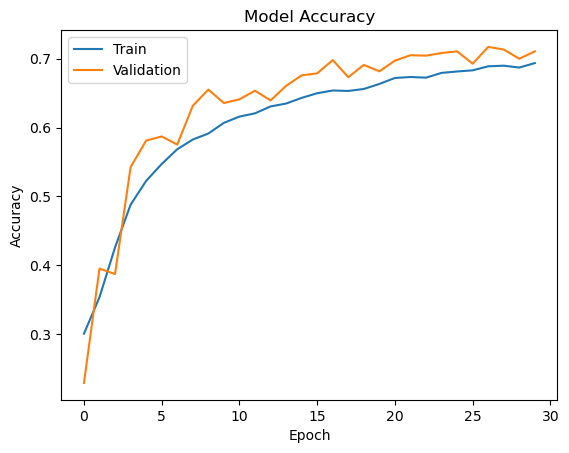

In [17]:
# Create a model
from random import seed


model_grayscale_1 = cnn_model_grayscale_1()

# create early stopping  
early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 7,
                          verbose = 1,
                          restore_best_weights = True
                          )
#reduce learning rate callbacks
reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 7,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, reduce_learningrate]

# Generating the summary of the model
model_grayscale_1.summary()

# Fit the model
history = model_grayscale_1.fit(
            train_set, 
            validation_data = validation_set,
            epochs=30,
            shuffle=True,
            verbose=1,
            callbacks=callbacks_list,
            class_weight=class_weight,
)

#plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

model_grayscale_1.save('model_grayscale_1.keras')

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip_1 (RandomFlip)      │ (None, 48, 48, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_1               │ (None, 48, 48, 3)      │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 48, 48, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 48, 48, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 500)            │     9,216,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 25)             │        12,525 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 25)             │           100 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           104 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,322,477 (35.56 MB)

 Trainable params: 9,322,427 (35.56 MB)

 Non-trainable params: 50 (200.00 B)

Epoch 1/30


E0000 00:00:1734384300.073207   12988 meta_optimizer.cc:966] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/sequential_1_1/dropout_3_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


118/118 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - accuracy: 0.2818 - loss: 1.5030 - val_accuracy: 0.2292 - val_loss: 1.4634 - learning_rate: 0.0010
Epoch 2/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.3243 - loss: 1.3415 - val_accuracy: 0.2378 - val_loss: 1.3554 - learning_rate: 0.0010
Epoch 3/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.3997 - loss: 1.2596 - val_accuracy: 0.2952 - val_loss: 1.3053 - learning_rate: 0.0010
Epoch 4/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.4694 - loss: 1.1649 - val_accuracy: 0.4630 - val_loss: 1.1706 - learning_rate: 0.0010
Epoch 5/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.5116 - loss: 1.0923 - val_accuracy: 0.5618 - val_loss: 1.0453 - learning_rate: 0.0010
Epoch 6/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.5440 - loss: 1.0399 - val_accuracy: 0.5938 - val_loss: 0.9729 - learning_rate: 0.0010
Epoch 7/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.5609 - loss: 1.0069 - val_

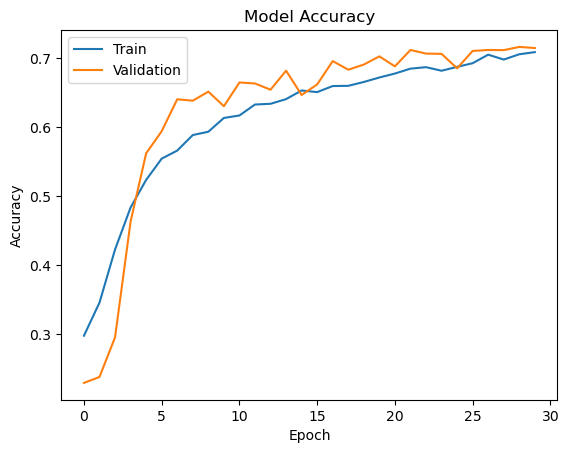

In [18]:
# Create a model
model_color_1 = cnn_model_color_1()

# create early stopping
early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 7,
                          verbose = 1,
                          restore_best_weights = True
                          )
# reduce learning rate callbacks
reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 7,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, reduce_learningrate]

# Generating the summary of the model
model_color_1.summary()

#fit model
history = model_color_1.fit(
            train_set_color, 
            validation_data = validation_set_color,
            epochs=30,
            shuffle=True,
            batch_size=128,
            verbose=1,
            callbacks=callbacks_list,
            class_weight=class_weight,
)

#plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
model_color_1.save('model_color_1.keras')

### **Evaluating the Model on the Test Set**

In [19]:
# Evaluate the model on the test set
accuracy = model_grayscale_1.evaluate(test_set, verbose = 2)
print("Model Grayscale 1 test accuracy: ", accuracy[1])
accuracy = model_color_1.evaluate(test_set_color, verbose = 2)
print("Model Color 1 test accuracy: ", accuracy[1])

1/1 - 0s - 35ms/step - accuracy: 0.7344 - loss: 0.6675
Model Grayscale 1 test accuracy:  0.734375
1/1 - 0s - 34ms/step - accuracy: 0.7578 - loss: 0.6402
Model Color 1 test accuracy:  0.7578125


**Observations and Insights:**
>The color model performed better on the testing data than the grayscale model 

### **Creating the second Convolutional Neural Network**

- Try out a slightly larger architecture

In [20]:
def cnn_model_grayscale_2():
    # Intializing a sequential model
    cnn_model = Sequential()
    # Adding the input layer
    cnn_model.add(Input(shape=(48, 48,1)))
    # Adding a rescaling layer to normalize the pixel values
    cnn_model.add(RandomFlip('horizontal'))
    # Adding a random rotation layer
    cnn_model.add(RandomRotation(0.2))
    # adding convolutional layer with 64 filters and a kernel size of 3x3
    cnn_model.add(Conv2D(64, (3, 3),padding='same', activation='relu'))
    cnn_model.add(MaxPooling2D((2, 2)))
    cnn_model.add(Dropout(0.2))
    cnn_model.add(Conv2D(64, (3, 3),padding='same', activation='relu'))
    cnn_model.add(MaxPooling2D((2, 2)))
    cnn_model.add(Dropout(0.2))
    cnn_model.add(Conv2D(128, (3, 3),padding='same', activation='relu'))
    cnn_model.add(Conv2D(256, (3, 3),padding='same', activation='relu'))
    cnn_model.add(MaxPooling2D((2, 2)))
    # Adding a batch normalization layer
    cnn_model.add(BatchNormalization())
    cnn_model.add(Dropout(0.2))
    cnn_model.add(Conv2D(64, (3, 3),padding='same', activation='relu'))
    cnn_model.add(MaxPooling2D((2, 2)))
    cnn_model.add(Dropout(0.2))
    # Flatten the input to add dense convolutional layers on top of it
    cnn_model.add(Flatten())

    # Adding a sequential layer with 380 neurons
    cnn_model.add(Dense(380, activation='relu'))

    # Adding a sequential layer with dropout of 0.2
    cnn_model.add(Dropout(0.2))

    # Adding a sequential layer with 25 neurons
    cnn_model.add(Dense(25, activation='relu'))
    
    # Adding a batch normalization layer
    cnn_model.add(BatchNormalization())
    # Adding a sequential layer with 380 neurons
    cnn_model.add(Dense(380, activation='relu'))
    # Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem
    cnn_model.add(Dense(4, activation='softmax'))

    # Using Adam Optimizer
    opt = Adam(learning_rate=.001)
    # Compile model
    cnn_model.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
    
    return cnn_model

In [21]:

def cnn_model_color_2():
    # Intializing a sequential model
    cnn_model = Sequential()
    # Adding the input layer
    cnn_model.add(Input(shape=(48, 48,3)))
    # Adding a random flip layer
    cnn_model.add(RandomFlip('horizontal'))
    # Adding a random rotation layer
    cnn_model.add(RandomRotation(0.2))
    # Add the Rescaling layer at the beginning
    cnn_model.add(Rescaling(1./255))
    
    # Adding a convolutional layer with 64 filters and a kernel size of 3x3
    cnn_model.add(Conv2D(64, (3, 3),padding='same', activation='relu'))
    cnn_model.add(MaxPooling2D((2, 2)))
    cnn_model.add(Dropout(0.2))
    cnn_model.add(Conv2D(256, (3, 3),padding='same', activation='relu'))
    cnn_model.add(MaxPooling2D((2, 2)))
    cnn_model.add(Dropout(0.2))
    # Adding a batch normalization layer
    cnn_model.add(BatchNormalization())
    cnn_model.add(Conv2D(256, (3, 3),padding='same', activation='relu'))
    cnn_model.add(MaxPooling2D((2, 2)))
    cnn_model.add(Dropout(0.2))
    cnn_model.add(Conv2D(500, (3, 3),padding='same', activation='relu'))
    cnn_model.add(MaxPooling2D((2, 2)))
    cnn_model.add(Dropout(0.4))
     
    
    # Flatten the input to add dense convolutional layers on top of it
    cnn_model.add(Flatten())

    # Adding a sequential layer with 500 neurons
    cnn_model.add(Dense(500, activation='relu'))

    # Adding a sequential layer with dropout of 0.4
    cnn_model.add(Dropout(0.4))

    # Adding a sequential layer with 128 neurons
    cnn_model.add(Dense( 128, activation='relu'))
    
    # Adding a batch normalization layer
    cnn_model.add(BatchNormalization())
    # Adding a sequential layer with 380 neurons
    cnn_model.add(Dense(380, activation='relu'))
    # Adding the output layer with 4 neurons and activation functions as softmax since this is a multi-class classification problem
    cnn_model.add(Dense(4, activation='softmax'))

    # Using Adam Optimizer
    opt = Adam(learning_rate=1e-3)

    # Compile model
    cnn_model.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
    
    return cnn_model

### **Compiling and Training the Model**

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip_2 (RandomFlip)      │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_2               │ (None, 48, 48, 1)      │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 6, 6, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 6, 6, 64)       │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 380)            │       219,260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 380)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 25)             │         9,525 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 25)             │           100 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 380)            │         9,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 4)              │         1,524 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 795,425 (3.03 MB)

 Trainable params: 794,863 (3.03 MB)

 Non-trainable params: 562 (2.20 KB)

Epoch 1/30


E0000 00:00:1734384425.895782   12988 meta_optimizer.cc:966] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/sequential_2_1/dropout_6_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


118/118 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step - accuracy: 0.3034 - loss: 1.3639 - val_accuracy: 0.2201 - val_loss: 1.7261 - learning_rate: 0.0010
Epoch 2/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - accuracy: 0.3256 - loss: 1.3421 - val_accuracy: 0.2336 - val_loss: 1.5605 - learning_rate: 0.0010
Epoch 3/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.3254 - loss: 1.3393 - val_accuracy: 0.2292 - val_loss: 1.6327 - learning_rate: 0.0010
Epoch 4/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.3395 - loss: 1.3220 - val_accuracy: 0.2292 - val_loss: 2.2102 - learning_rate: 0.0010
Epoch 5/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.3964 - loss: 1.2567
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.3967 - loss: 1.2564 - val_accuracy: 0.3215 - val_loss: 1.9485 - learning_rate: 0.0010
Epoch 6/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.4839 - loss: 1.1314 - val_

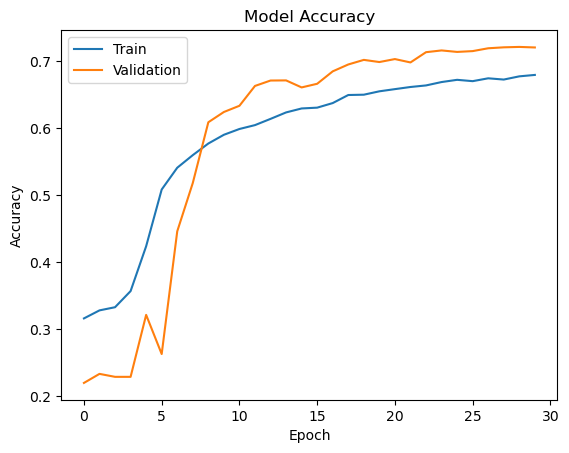

In [22]:
model_grayscale_2 = cnn_model_grayscale_2()


early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 7,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, reduce_learningrate]


# Generating the summary of the model
model_grayscale_2.summary()

history = model_grayscale_2.fit(
            train_set, 
            validation_data = validation_set,
            epochs=30,
            shuffle=True,
            batch_size=128,
            verbose=1,
            callbacks=callbacks_list,
            class_weight=class_weight,
)
accuracy = model_grayscale_2.evaluate(test_set, verbose = 2)

#plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
model_grayscale_2.save('model_grayscale_2.keras')

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip_3 (RandomFlip)      │ (None, 48, 48, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_3               │ (None, 48, 48, 3)      │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_2 (Rescaling)         │ (None, 48, 48, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 48, 48, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 24, 24, 256)    │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 6, 6, 500)      │     1,152,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 3, 3, 500)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 3, 3, 500)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 4500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 500)            │     2,250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │        64,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 380)            │        49,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 4)              │         1,524 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 4,258,792 (16.25 MB)

 Trainable params: 4,258,024 (16.24 MB)

 Non-trainable params: 768 (3.00 KB)

Epoch 1/30


E0000 00:00:1734384600.919506   12988 meta_optimizer.cc:966] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/sequential_3_1/dropout_11_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


118/118 ━━━━━━━━━━━━━━━━━━━━ 11s 66ms/step - accuracy: 0.2815 - loss: 1.4298 - val_accuracy: 0.2312 - val_loss: 1.3672 - learning_rate: 0.0010
Epoch 2/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - accuracy: 0.2928 - loss: 1.3774 - val_accuracy: 0.2292 - val_loss: 1.6773 - learning_rate: 0.0010
Epoch 3/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - accuracy: 0.3050 - loss: 1.3636 - val_accuracy: 0.2292 - val_loss: 1.6506 - learning_rate: 0.0010
Epoch 4/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - accuracy: 0.3067 - loss: 1.3666 - val_accuracy: 0.2364 - val_loss: 1.6237 - learning_rate: 0.0010
Epoch 5/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - accuracy: 0.3066 - loss: 1.3532 - val_accuracy: 0.2292 - val_loss: 1.6718 - learning_rate: 0.0010
Epoch 6/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - accuracy: 0.3263 - loss: 1.3456 - val_accuracy: 0.2292 - val_loss: 1.6613 - learning_rate: 0.0010
Epoch 7/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - accuracy: 0.3516 - loss: 1.2962 - val

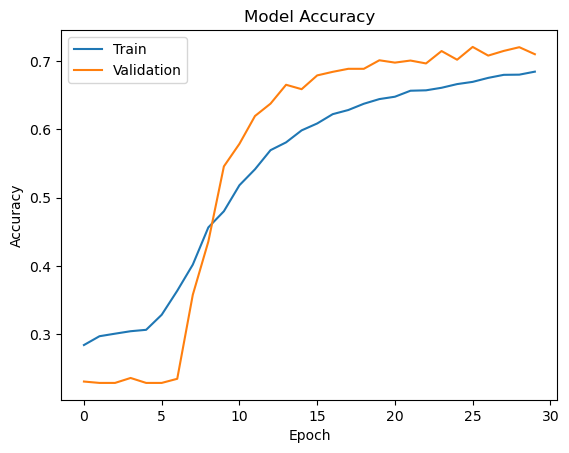

In [23]:
model_color_2 = cnn_model_color_2()


early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 12,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 7,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, reduce_learningrate]

# Generating the summary of the model
model_color_2.summary()

history = model_color_2.fit(
            train_set_color, 
            validation_data = validation_set_color,
            epochs=30,
            shuffle=True,
            batch_size=128,
            verbose=1,
            callbacks=callbacks_list,
            class_weight=class_weight,
)
accuracy = model_color_2.evaluate(test_set_color, verbose = 2)

#plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
model_color_2.save('model_color_2.keras')

### **Evaluating the Model on the Test Set**

In [24]:
accuracy = model_grayscale_2.evaluate(test_set, verbose = 2)
print("Model Grayscale 2 test accuracy: ", accuracy[1])
accuracy = model_color_2.evaluate(test_set_color, verbose = 2)
print("Model Color 2 test accuracy: ", accuracy[1])

1/1 - 0s - 31ms/step - accuracy: 0.7188 - loss: 0.6446
Model Grayscale 2 test accuracy:  0.71875
1/1 - 0s - 34ms/step - accuracy: 0.7031 - loss: 0.6516
Model Color 2 test accuracy:  0.703125


**Observations and Insights:**
>The grayscale model performed better than the color model but the model performed worse than the previous

## **Think About It:**

* Did the models have a satisfactory performance? If not, then what are the possible reasons? 
>The models seem to perform over 70% accuracy. The model might be able to perform better if more data was available. 
* Which Color mode showed better overall performance? What are the possible reasons? Do you think having 'rgb' color mode is needed because the images are already black and white? 
>The models performed around the same accuracy but the color was a little higher for the first CNN. This may be because the color has additional information based on the rgb data.

## **Transfer Learning Architectures**

In this section, we will create several Transfer Learning architectures. For the pre-trained models, we will select three popular architectures namely, VGG16, ResNet v2, and Efficient Net. The difference between these architectures and the previous architectures is that these will require 3 input channels while the earlier ones worked on 'grayscale' images. Therefore, we need to create new DataLoaders.

### **Creating our Data Loaders for Transfer Learning Architectures**

In this section, we are creating data loaders that we will use as inputs to our Neural Network. We will have to go with color_mode = 'rgb' as this is the required format for the transfer learning architectures.

In [25]:
#batch size
batch_size  = 128

# Load the training dataset
train_set_color = image_dataset_from_directory(folder_path + 'train/',
                                              image_size = (picture_size, picture_size),
                                              color_mode = "rgb",
                                              batch_size = batch_size,
                                              label_mode = 'categorical',
                                              seed = random_seed,
                                              class_names = emotions,
                                              shuffle = True)
# Load the validation dataset
validation_set_color = image_dataset_from_directory(folder_path + 'validation/',
                                              image_size = (picture_size, picture_size),
                                              color_mode = "rgb",
                                              batch_size = batch_size,
                                              label_mode = 'categorical',
                                              seed = random_seed,
                                              class_names = emotions,
                                              shuffle = True)
# Load the test dataset
test_set_color = image_dataset_from_directory(folder_path + 'test/',
                                              image_size = (picture_size, picture_size),
                                              color_mode = "rgb",
                                              batch_size = batch_size,
                                              label_mode = 'categorical',
                                              seed = random_seed,
                                              class_names = emotions,
                                              shuffle = True)

# # Configure the dataset for performance
AUTOTUNE = tf.data.AUTOTUNE


train_set_color = train_set_color.cache().prefetch(buffer_size=AUTOTUNE)


validation_set_color = validation_set_color.cache().prefetch(buffer_size=AUTOTUNE)




Found 15065 files belonging to 4 classes.
Found 4970 files belonging to 4 classes.
Found 128 files belonging to 4 classes.


## **VGG16 Model**

### **Importing the VGG16 Architecture**

In [26]:
from keras.applications import VGG16
VGG16_model = VGG16(weights='imagenet', include_top=False)
VGG16_model.summary()
for layer in VGG16_model.layers:
    layer.trainable = False

# Unfreeze the top layers for fine-tuning
for layer in VGG16_model.layers[-4:]:
    layer.trainable = True

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, None, None, 64) │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, None, None, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, None, None,     │        73,856 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, None, None,     │       147,584 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, None, None,     │       295,168 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, None, None,     │     1,180,160 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │             

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

### **Model Building**

- Import VGG16 upto the layer of your choice and add Fully Connected layers on top of it.

In [27]:

def cnn_model_color_VGG16_model():
    # Intializing a sequential model

    cnn_model = Sequential()
    # Adding the input layer
    cnn_model.add(Input(shape=(48, 48,3)))
    # Adding a random flip layer
    cnn_model.add(RandomFlip('horizontal'))
    # Adding a random rotation layer
    cnn_model.add(RandomRotation(0.2))
    
    # Add the Rescaling layer at the beginning
    cnn_model.add(Rescaling(1./255))
    
    #resize the image to 224x224
    cnn_model.add(Resizing(224, 224))
    # Add the VGG16 model
    cnn_model.add(VGG16_model)
    # Add convolutional layers
    
    cnn_model.add(GlobalAveragePooling2D())
    # Flatten the input to add dense convolutional layers on top of it
    cnn_model.add(Flatten())
    

    # Adding a sequential layer with 300 neurons
    cnn_model.add(Dense(300, activation='relu'))
    # Adding a sequential layer with dropout of 0.2
    cnn_model.add(Dropout(0.2))
    # Adding a sequential layer with 200 neurons
    cnn_model.add(Dense(200, activation='relu'))
    
    cnn_model.add(LeakyReLU(alpha=0.1))
    
    cnn_model.add(Dense(100, activation='relu'))
    
                  
    cnn_model.add(Dropout(0.2))
    # Adding a batch normalization layer
    cnn_model.add(BatchNormalization())
    # Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem
    cnn_model.add(Dense(4, activation='softmax'))


    
    # Using Adam Optimizer
    opt = Adam(learning_rate=0.0001)

    # Compile model
    cnn_model.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
    
    return cnn_model


### **Compiling and Training the VGG16 Model**

In [28]:
# Clear the Keras backend session
tf.keras.backend.clear_session()
tf.random.set_seed(42)
model_color_VGG16_model = cnn_model_color_VGG16_model()

# Generating the summary of the model
model_color_VGG16_model.summary()

history = model_color_VGG16_model.fit(
            train_set_color, 
            validation_data = validation_set_color,
            epochs=30,
            shuffle=True,
            batch_size=128,
            verbose=1,
            callbacks=[tf.keras.callbacks.EarlyStopping(patience=12, restore_best_weights=True),
                            ReduceLROnPlateau(monitor = 'val_loss',
                                factor = 0.2,
                                patience = 3,
                                verbose = 1,
                                min_delta = 0.0001)],
            class_weight=class_weight,
)

model_color_VGG16_model.save('model_color_VGG16_model.keras')

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip (RandomFlip)        │ (None, 48, 48, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation                 │ (None, 48, 48, 3)      │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 48, 48, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resizing (Resizing)             │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       153,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 200)            │        60,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           404 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,949,692 (57.03 MB)

 Trainable params: 7,314,228 (27.90 MB)

 Non-trainable params: 7,635,464 (29.13 MB)

Epoch 1/30


2024-12-16 16:33:40.503920: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.62GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-12-16 16:33:40.535716: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.05GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-12-16 16:33:40.536189: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.55GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
W0000 00:00:1734384820.536213   13138 gpu_utils.cc:68] 

118/118 ━━━━━━━━━━━━━━━━━━━━ 73s 551ms/step - accuracy: 0.3514 - loss: 1.5277 - val_accuracy: 0.6076 - val_loss: 1.0741 - learning_rate: 1.0000e-04
Epoch 2/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 56s 476ms/step - accuracy: 0.5401 - loss: 1.0686 - val_accuracy: 0.4700 - val_loss: 1.1801 - learning_rate: 1.0000e-04
Epoch 3/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 56s 476ms/step - accuracy: 0.5971 - loss: 0.9415 - val_accuracy: 0.5940 - val_loss: 0.9751 - learning_rate: 1.0000e-04
Epoch 4/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 56s 479ms/step - accuracy: 0.6308 - loss: 0.8566 - val_accuracy: 0.6300 - val_loss: 0.9096 - learning_rate: 1.0000e-04
Epoch 5/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 56s 477ms/step - accuracy: 0.6496 - loss: 0.8265 - val_accuracy: 0.6346 - val_loss: 0.8628 - learning_rate: 1.0000e-04
Epoch 6/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 57s 481ms/step - accuracy: 0.6682 - loss: 0.7936 - val_accuracy: 0.6698 - val_loss: 0.8136 - learning_rate: 1.0000e-04
Epoch 7/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 56s 475ms/step - 

### **Evaluating the VGG16 model**

1/1 - 0s - 446ms/step - accuracy: 0.7969 - loss: 0.5831


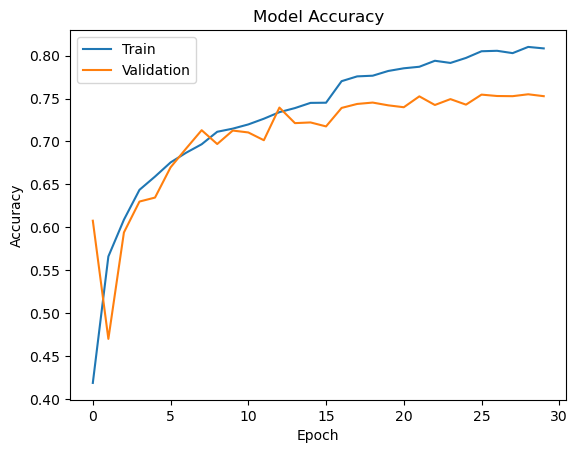

In [29]:
accuracy = model_color_VGG16_model.evaluate(test_set_color, verbose = 2)

#plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


**Think About It:**

- What do you infer from the general trend in the training performance? 
>
>Training seems to continue increasing as the epochs continue.
- Is the training accuracy consistently improving? 
>Training accuracy consistently improved. 
- Is the validation accuracy also improving similarly?
>validation accuracy consistently improved until 20 epochs. This might mean the model is over fitting on the training data.

**Observations and Insights:**
>Model seems to generalize well reaching a 80% accuracy on the testing data but looks to be overfitting on the training data

**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance**

## **ResNet V2 Model**

In [30]:
from keras.applications import ResNet50V2
ResNetV2_model = ResNet50V2(weights='imagenet', include_top=False)
ResNetV2_model.summary()
# Set the ResNetV2 layers to non-trainable
for layer in ResNetV2_model.layers:
    layer.trainable = False

# Unfreeze the top layers for fine-tuning
for layer in ResNetV2_model.layers[-4:]:
    layer.trainable = True

Model: "resnet50v2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, None,      │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, None,      │      9,472 │ conv1_pad[0][0]   │
│                     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, None,      │          0 │ conv1_conv[0][0]  │
│ (ZeroPadding2D)     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, None,      │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, None,      │        256 │ pool1_pool[0][0]  │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, None,      │          0 │ conv2_block1_pre… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, None,      │      4,096 │ conv2_block1_pre… │
│ (Conv2D)            │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, None,      │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, None,      │          0 │ conv2_block1_1_b… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_pad  │ (None, None,      │          0 │ conv2_block1_1_r… │
│ (ZeroPadding2D)     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, None,      │     36,864 │ conv2_block1_2_p… │
│ (Conv2D)            │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, None,      │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, None,      │          0 │ conv2_block1_2_b… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, None,      │     16,640 │ conv2_block1_pre… │
│ (Conv2D)            │ None, 256)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, None,      │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ None, 256)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_out    │ (None, None,      │          0 │ conv2_block1_0_c

 Total params: 23,564,800 (89.89 MB)

 Trainable params: 23,519,360 (89.72 MB)

 Non-trainable params: 45,440 (177.50 KB)

### **Model Building**

- Import Resnet v2 upto the layer of your choice and add Fully Connected layers on top of it.

In [31]:

def cnn_model_color_ResNetV2_model():
    # Intializing a sequential model
    

    # Initialize a sequential model
    cnn_model = Sequential()
    cnn_model.add(Input(shape=(48, 48,3)))
    cnn_model.add(RandomFlip('horizontal'))
    cnn_model.add(RandomRotation(0.2))
    # Intializing a sequential model
    
  
    cnn_model.add(Rescaling(1./255))
    

     # Add the VGG16 model
    cnn_model.add(Resizing(224, 224))
    cnn_model.add(ResNetV2_model)
    # Add convolutional layers
    
    cnn_model.add(GlobalAveragePooling2D())
    
    # Flatten the input to add dense convolutional layers on top of it
    cnn_model.add(Flatten())
    

    # Adding a sequential layer with 60 neurons
    cnn_model.add(Dense(300, activation='relu'))

    cnn_model.add(Dropout(0.2))
    
    cnn_model.add(Dense(200, activation='relu'))
    
    cnn_model.add(Dense(100, activation='relu'))
    
                  
    cnn_model.add(Dropout(0.2))
    cnn_model.add(BatchNormalization())
    # Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem
    cnn_model.add(Dense(4, activation='softmax'))


    
    # Using Adam Optimizer
    opt = Adam(learning_rate=0.001)

    # Compile model
    cnn_model.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
    
    return cnn_model


### **Compiling and Training the Model**

In [32]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)
model_color_ResNetV2_model = cnn_model_color_ResNetV2_model()
# Generating the summary of the model
model_color_ResNetV2_model.summary()

history = model_color_ResNetV2_model.fit(
            train_set_color, 
            validation_data = validation_set_color,
            epochs=30,
            shuffle=True,
            batch_size=128,
            verbose=1,
            callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
                            ReduceLROnPlateau(monitor = 'val_loss',
                                factor = 0.2,
                                patience = 3,
                                verbose = 1,
                                min_delta = 0.0001)],
            class_weight=class_weight,
)
model_color_ResNetV2_model.save('model_color_ResNetV2_model.keras')

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip (RandomFlip)        │ (None, 48, 48, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation                 │ (None, 48, 48, 3)      │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 48, 48, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resizing (Resizing)             │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50v2 (Functional)         │ (None, 7, 7, 2048)     │    23,564,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       614,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 200)            │        60,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           404 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,260,604 (92.55 MB)

 Trainable params: 1,750,324 (6.68 MB)

 Non-trainable params: 22,510,280 (85.87 MB)

Epoch 1/30


2024-12-16 17:06:32.087165: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:378] Garbage collection: deallocate free memory regions (i.e., allocations) so that we can re-allocate a larger region to avoid OOM due to memory fragmentation. If you see this message frequently, you are running near the threshold of the available device memory and re-allocation may incur great performance overhead. You may try smaller batch sizes to observe the performance impact. Set TF_ENABLE_GPU_GARBAGE_COLLECTION=false if you'd like to disable this feature.


118/118 ━━━━━━━━━━━━━━━━━━━━ 65s 488ms/step - accuracy: 0.4424 - loss: 1.3159 - val_accuracy: 0.4565 - val_loss: 1.3736 - learning_rate: 0.0010
Epoch 2/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 52s 441ms/step - accuracy: 0.5811 - loss: 0.9989 - val_accuracy: 0.6324 - val_loss: 0.9061 - learning_rate: 0.0010
Epoch 3/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 51s 437ms/step - accuracy: 0.6079 - loss: 0.9205 - val_accuracy: 0.6398 - val_loss: 0.8440 - learning_rate: 0.0010
Epoch 4/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 52s 441ms/step - accuracy: 0.6273 - loss: 0.8716 - val_accuracy: 0.6740 - val_loss: 0.8192 - learning_rate: 0.0010
Epoch 5/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 52s 441ms/step - accuracy: 0.6534 - loss: 0.8304 - val_accuracy: 0.6509 - val_loss: 0.9025 - learning_rate: 0.0010
Epoch 6/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 51s 435ms/step - accuracy: 0.6521 - loss: 0.8224 - val_accuracy: 0.6867 - val_loss: 0.8315 - learning_rate: 0.0010
Epoch 7/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step - accuracy: 0.6673 - loss: 

### **Evaluating the ResNet Model**

1/1 - 0s - 241ms/step - accuracy: 0.7422 - loss: 0.6876


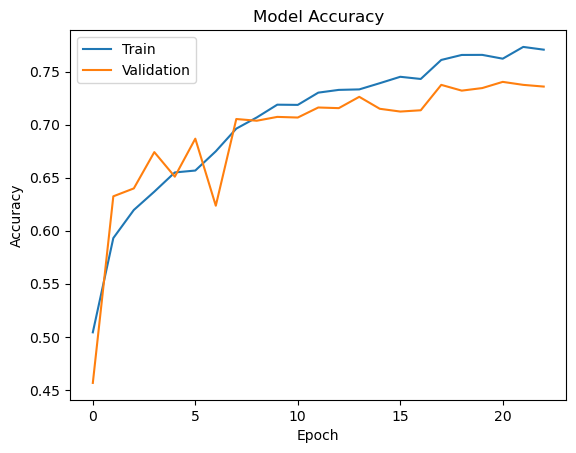

In [33]:
accuracy = model_color_ResNetV2_model.evaluate(test_set_color, verbose = 2)

#plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


**Observations and Insights:**
>Model validation accuracy seemed to perform the better than the training. The model had a accuracy of 74.22% on the test data so the model is generalizing well

**Note: You can even go back and build your own architecture on top of the ResNet Transfer layer and see if you can improve the performance.**

## **EfficientNet Model**

In [34]:
from keras.applications import EfficientNetB0
EfficientNetV2_model = EfficientNetB0(weights='imagenet', include_top=False)
# Freeze the ResNetV2 model layers
for layer in EfficientNetV2_model.layers:
    layer.trainable = False

# Unfreeze the top layers for fine-tuning
for layer in EfficientNetV2_model.layers[-4:]:
    layer.trainable = True

### **Model Building**

- Import EfficientNet upto the layer of your choice and add Fully Connected layers on top of it.

In [35]:
def cnn_model_color_EfficientNetV2_model_model():
    # Intializing a sequential model
    

    # Initialize a sequential model
    cnn_model = Sequential()
    cnn_model.add(Input(shape=(48, 48,3)))
    cnn_model.add(RandomFlip('horizontal'))
    cnn_model.add(RandomRotation(0.2))
    # Intializing a sequential model
    
  
    cnn_model.add(Rescaling(1./255))
    

     # Add the VGG16 model
    cnn_model.add(Resizing(256, 256))
     # Add the VGG16 model
    cnn_model.add(EfficientNetV2_model)
    # Flatten the input to add dense convolutional layers on top of it
    cnn_model.add(Flatten())
    

 

    # Adding a sequential layer with 60 neurons
    cnn_model.add(Dense(300, activation='relu'))

    cnn_model.add(Dropout(0.2))
    
    cnn_model.add(Dense(200, activation='relu'))
    cnn_model.add(LeakyReLU(alpha=0.1))
    
    cnn_model.add(Dense(100, activation='relu'))
    
                  
    cnn_model.add(Dropout(0.2))
    cnn_model.add(BatchNormalization())
    # Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem
    cnn_model.add(Dense(4, activation='softmax'))


    
    # Using Adam Optimizer
    opt = Adam(learning_rate=0.0001)
    # Compile model
    cnn_model.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
    
    return cnn_model


### **Compiling and Training the Model**

In [36]:

model_color_EfficientNetV2_model_model = cnn_model_color_EfficientNetV2_model_model()

# Generating the summary of the model
model_color_EfficientNetV2_model_model.summary()

history = model_color_EfficientNetV2_model_model.fit(
            train_set_color, 
            validation_data = validation_set_color,
            epochs=30,
            shuffle=True,
            batch_size=128,
            verbose=1,
            callbacks=[tf.keras.callbacks.EarlyStopping(patience=12, restore_best_weights=True),
                            ReduceLROnPlateau(monitor = 'val_loss',
                                factor = 0.2,
                                patience = 3,
                                verbose = 1,
                                min_delta = 0.0001)],
            class_weight=class_weight,
)
model_color_EfficientNetV2_model_model.save('model_color_EfficientNetV2_model_model.keras')

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip_1 (RandomFlip)      │ (None, 48, 48, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_1               │ (None, 48, 48, 3)      │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_3 (Rescaling)         │ (None, 48, 48, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resizing_1 (Resizing)           │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 8, 8, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 81920)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 300)            │    24,576,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 200)            │        60,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │           404 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,706,975 (109.51 MB)

 Trainable params: 25,070,004 (95.63 MB)

 Non-trainable params: 3,636,971 (13.87 MB)

Epoch 1/30


E0000 00:00:1734387996.121450   12988 meta_optimizer.cc:966] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/sequential_1_1/efficientnetb0_1/block2b_drop_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


118/118 ━━━━━━━━━━━━━━━━━━━━ 55s 395ms/step - accuracy: 0.2489 - loss: 1.7801 - val_accuracy: 0.3668 - val_loss: 1.3633 - learning_rate: 1.0000e-04
Epoch 2/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 40s 340ms/step - accuracy: 0.2508 - loss: 1.6649 - val_accuracy: 0.3668 - val_loss: 1.3484 - learning_rate: 1.0000e-04
Epoch 3/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 38s 321ms/step - accuracy: 0.2576 - loss: 1.6061 - val_accuracy: 0.2292 - val_loss: 1.4373 - learning_rate: 1.0000e-04
Epoch 4/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 38s 323ms/step - accuracy: 0.2502 - loss: 1.5863 - val_accuracy: 0.3668 - val_loss: 1.3596 - learning_rate: 1.0000e-04
Epoch 5/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step - accuracy: 0.2493 - loss: 1.5487
Epoch 5: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
118/118 ━━━━━━━━━━━━━━━━━━━━ 38s 323ms/step - accuracy: 0.2494 - loss: 1.5486 - val_accuracy: 0.3668 - val_loss: 1.3751 - learning_rate: 1.0000e-04
Epoch 6/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 38s 321ms/step - accur

### **Evaluating the EfficientnetNet Model**

1/1 - 0s - 471ms/step - accuracy: 0.2500 - loss: 1.4229


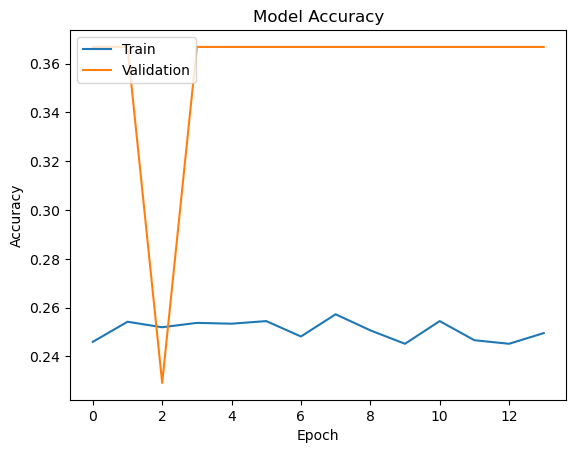

In [37]:
accuracy = model_color_EfficientNetV2_model_model.evaluate(test_set_color, verbose = 2)

#plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations and Insights:**
>The model wasnt able to understand the data at all.

**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance.**

**Think About It:**

* What is your overall performance of these Transfer Learning Architectures? Can we draw a comparison of these models' performances. Are we satisfied with the accuracies that we have received? 
>
>I think the vgg16 model performance was very good. I would like the other models to at least be above 70% but they werent bad.
>
  
* Do you think our issue lies with 'rgb' color_mode?
>
>It seems like the color data may have helped the vgg16 model with extra training information
>

Now that we have tried multiple pre-trained models, let's build a complex CNN architecture and see if we can get better performance.

## **Building a Complex Neural Network Architecture**

In this section, we will build a more complex Convolutional Neural Network Model that has close to as many parameters as we had in our Transfer Learning Models. However, we will have only 1 input channel for our input images.

## **Creating our Data Loaders**

In this section, we are creating data loaders which we will use as inputs to the more Complicated Convolutional Neural Network. We will go ahead with color_mode = 'grayscale'.

In [38]:
batch_size  = 128

train_set = tf.keras.utils.image_dataset_from_directory(folder_path + 'train/',
                                              image_size = (picture_size, picture_size),
                                              color_mode = "grayscale",
                                              batch_size = batch_size,
                                              label_mode = 'categorical',
                                              #classes = emotions,
                                              shuffle = True)

validation_set = tf.keras.utils.image_dataset_from_directory(folder_path + 'validation/',
                                              image_size = (picture_size, picture_size),
                                              color_mode = "grayscale",
                                              batch_size = batch_size,
                                              label_mode = 'categorical',
                                              #classes = emotions,
                                              shuffle = True)

test_set = tf.keras.utils.image_dataset_from_directory(folder_path + 'test/',
                                              image_size = (picture_size, picture_size),
                                              color_mode = "grayscale",
                                              batch_size = batch_size,
                                              label_mode = 'categorical',
                                              #classes = emotions,
                                              shuffle = True)


# Configure the dataset for performance
AUTOTUNE = tf.data.experimental.AUTOTUNE


train_set = train_set.prefetch(buffer_size=AUTOTUNE)

validation_set_color = validation_set.prefetch(buffer_size=AUTOTUNE)

Found 15065 files belonging to 4 classes.
Found 4970 files belonging to 4 classes.
Found 128 files belonging to 4 classes.


### **Model Building**

- Try building a layer with 5 Convolutional Blocks and see if performance increases.

In [39]:
def cnn_model_grayscale_3():
    # Intializing a sequential model
    cnn_model = Sequential()
    # Adding the input layer
    cnn_model.add(Input(shape=(48, 48,1)))
    # Adding a rescaling layer to normalize the pixel values
    cnn_model.add(RandomFlip('horizontal'))
    # Adding a random rotation layer
    cnn_model.add(RandomRotation(0.2))
    # adding convolutional layer with 64 filters and a kernel size of 3x3
    cnn_model.add(Conv2D(64, (3, 3),padding='same', activation='relu'))
    cnn_model.add(MaxPooling2D((2, 2)))
    cnn_model.add(Dropout(0.4))
    cnn_model.add(Conv2D(64, (3, 3),padding='same', activation='relu'))
    cnn_model.add(MaxPooling2D((2, 2)))
    cnn_model.add(Dropout(0.2))
    cnn_model.add(Conv2D(128, (3, 3),padding='same', activation='relu'))
    cnn_model.add(MaxPooling2D((2, 2)))
    cnn_model.add(Dropout(0.2))
    cnn_model.add(Conv2D(256, (3, 3),padding='same', activation='relu'))
    cnn_model.add(MaxPooling2D((2, 2)))
    # Adding a batch normalization layer
    cnn_model.add(BatchNormalization())
    cnn_model.add(Dropout(0.2))
    cnn_model.add(Conv2D(500, (3, 3),padding='same', activation='relu'))
    cnn_model.add(MaxPooling2D((2, 2)))
    cnn_model.add(Dropout(0.2))
    # Flatten the input to add dense convolutional layers on top of it
    cnn_model.add(Flatten())

    # Adding a sequential layer with 380 neurons
    cnn_model.add(Dense(380, activation='relu'))

    # Adding a sequential layer with dropout of 0.2
    cnn_model.add(Dropout(0.2))

    # Adding a sequential layer with 25 neurons
    cnn_model.add(Dense(25, activation='relu'))
    
    # Adding a batch normalization layer
    cnn_model.add(BatchNormalization())
    # Adding a sequential layer with 380 neurons
    cnn_model.add(Dense(380, activation='relu'))
    # Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem
    cnn_model.add(Dense(4, activation='softmax'))

    # Using Adam Optimizer
    opt = Adam(learning_rate=.0001)
    # Compile model
    cnn_model.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
    
    return cnn_model

### **Compiling and Training the Model**

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip_2 (RandomFlip)      │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_2               │ (None, 48, 48, 1)      │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 6, 6, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 3, 3, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 3, 3, 500)      │     1,152,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 1, 1, 500)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 1, 1, 500)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 380)            │       190,380 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 380)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 25)             │         9,525 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 25)             │           100 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,771,525 (6.76 MB)

 Trainable params: 1,770,963 (6.76 MB)

 Non-trainable params: 562 (2.20 KB)

Epoch 1/30


E0000 00:00:1734388548.738106   12988 meta_optimizer.cc:966] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/sequential_2_1/dropout_4_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


118/118 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - accuracy: 0.2891 - loss: 1.3880 - val_accuracy: 0.2292 - val_loss: 1.4168 - learning_rate: 1.0000e-04
Epoch 2/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.3163 - loss: 1.3554 - val_accuracy: 0.2292 - val_loss: 1.5324 - learning_rate: 1.0000e-04
Epoch 3/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.3152 - loss: 1.3525 - val_accuracy: 0.2292 - val_loss: 1.5523 - learning_rate: 1.0000e-04
Epoch 4/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - accuracy: 0.3145 - loss: 1.3505 - val_accuracy: 0.2292 - val_loss: 1.5418 - learning_rate: 1.0000e-04
Epoch 5/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.3198 - loss: 1.3478 - val_accuracy: 0.2316 - val_loss: 1.5394 - learning_rate: 1.0000e-04
Epoch 6/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.3179 - loss: 1.3495 - val_accuracy: 0.2292 - val_loss: 1.5582 - learning_rate: 1.0000e-04
Epoch 7/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.32

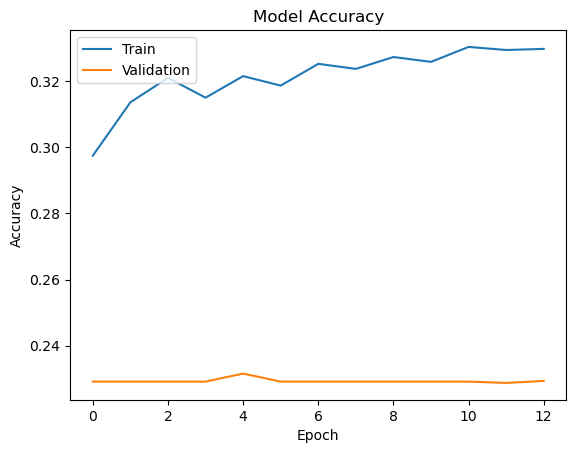

In [40]:
model_grayscale_3 = cnn_model_grayscale_3()


early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 12,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 7,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, reduce_learningrate]


# Generating the summary of the model
model_grayscale_3.summary()

history = model_grayscale_3.fit(
            train_set, 
            validation_data = validation_set,
            epochs=30,
            shuffle=True,
            batch_size=128,
            verbose=1,
            callbacks=callbacks_list,
            class_weight=class_weight,
)

model_grayscale_3.save('model_grayscale_3.keras')
#plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### **Evaluating the Model on Test Set**

In [41]:
accuracy = model_grayscale_3.evaluate(test_set, verbose = 2)
print("Model Color 3 test accuracy: ", accuracy[1])

1/1 - 0s - 32ms/step - accuracy: 0.2500 - loss: 1.4917
Model Color 3 test accuracy:  0.25


**Observations and Insights:**
>The model did was not able to understand the data

### **Plotting the Confusion Matrix for the chosen final model**

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step
              precision    recall  f1-score   support

       happy       0.87      0.84      0.86        32
         sad       0.69      0.78      0.74        32
     neutral       0.72      0.72      0.72        32
    surprise       0.93      0.84      0.89        32

    accuracy                           0.80       128
   macro avg       0.80      0.80      0.80       128
weighted avg       0.80      0.80      0.80       128



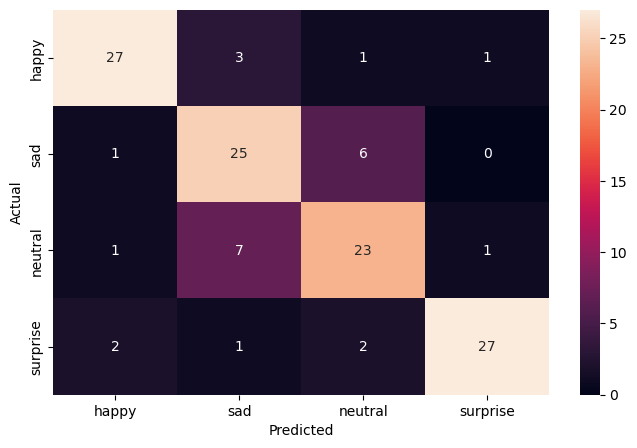

In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

test_images, test_labels = next(iter(test_set_color))

y_pred =  model_color_VGG16_model.predict(test_images)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(test_labels, axis = 1)


print(classification_report(y_true, y_pred, target_names=emotions))
# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['happy', 'sad', 'neutral', 'surprise'], yticklabels = ['happy', 'sad', 'neutral', 'surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Observations and Insights:**
>The model seemed to have a hard time distinguishing between neutral and sad but the other emotions. This might mean that some of the pictures in the training sets for sad and neutral look similar. The model did well distinguishing the other emotions

**Conclusion:**
>The VGG16 model with an accuracy of 79.69%  and f1-score of .8 is the best model that was found in the experiment. It does a good job at predicting the human facial emotion

### **Insights**

### **Refined insights**:
- The data might need to be looked at more since the model had a hard time distinguishing between neutral and sad pictures. This could be because the lips seem to be more of a upside down U. 

### **Comparison of various techniques and their relative performance**:
- The transfer learning technique enables developers to quickly create high-performing models by leveraging pre-trained CNN models. Using this approach, I built a model that achieved a test accuracy of 79.8%.

### **Proposal for the final solution design**:
- The model I would chose would be the VGG16 model. It performed the best out of all the models tested 

### **Executive summary**
- What are the most important findings from the analysis done in Milestone 
  >1. The data needed cleaning. There was multiple images which were blank or not useable so they had to be removed from the dataset before training, testing, and validation.
  >2. VGG16 was the best performing model out of all of them. 
  >3. The VGG16 had a hard time distinguishing between sad and neutral.
- Provide the final proposed model specifications
  >The final model is the VGG16. The model is made using VGG16 model as the transfer model using a dense layer of 300, dropout of .2, another dense of 200, a leaky relu of .1, a dense layer of 100, a dropout of .2, and a batch normalization to the output layer.

### **Problem and solution summary**
- Summary of the problem 
  >The problem is to identify the best performing model that accurately categorizes emotions based on facial expressions in images.
- Explain the reason for the proposed solution design 
  >The design includes preprocessing of data, creation of a CNN model architecture, and training and validation.
  >1. **Preprocessing** looks for bad images that can make the model less accurate improving the training and validation accuracy of the model.
  >2. **The CNN model architecture** is effective in understanding the spatial hierarchies of the image data. 
  >3. **training and validation** shows how well the model can identify the images based on emotion. This is used to choose the best model. 

  >All of this insures the best possible model out come for our problem. 
- How it would affect the problem/business?
  >1. Improved Accuracy 
    >- By preprocessing the data the models accuracy will be increased.
  >2. Enhanced Efficiency
    >- less time is used training the model using a transfer model. 
  >3. Reusability 
    >- transfer models can be used for similar tasks 
  

### **Recommendations for implementation**
- What are some key recommendations to implement the solutions? 
    >1. Increase the models training data
    >2. Fine tune the transfer learning models at deeper layers 
    >3. Use hyperparameter tuning to optimize the models
    >4. Further data cleaning for by data 
    >5. Set up an mlops life cycle for models based on a drift metric
    >6. Ensure that the models arent bias
- What are the key actionables for stakeholders? What is the expected benefit and/or costs? 
    >1. Create a data collection team 
    > - Creates a collection of high quality data 
    > - ensures that the datasets are balanced to prevent model bias
    > - This could improve the current model problem with predicting sad and neutral 
    >2. Create a machine learning engineer team
    > - This team can continue improving models
    > - Team can build pipelines and automatic deployments if drift is detected 
    >3. Create infrastructure for teams
    > - Create a non relational database for image data to archive past images allowing data sciences to analysis past data 
    > - Create compute resources to speed up training for the models 
- What are the key risks and challenges? 
    >1. Creating good data science teams can take lots of money with staff and compute resources
    >2. Collecting good data takes time. Data needs to go through a long process of cleaning for the preprocessing to create a good model 
    >3. If models are bias this could create problems for the product on roll out. Its important to take time to understand the basis in your model. 
- What further analysis needs to be done or what other associated problems need to be solved?
  >1. Check for class imbalances 
  >2. Feature extraction analysis to improve the understanding of the features in the image
  >3. Real world testing to understand bias 
  >4. Increase emotion categories for better granularity 

